In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

df = pd.read_csv('music.csv', delim_whitespace=False)

# Enable seeing entire dataset in output.
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# DELETE UNWANTED COLUMNS
df.drop(['artist.familiarity', 'artist.hotttnesss',  'artist.id', 'artist.latitude',
        'artist.location', 'artist.longitude', 'artist.similar', 'release.id',
        'release.name', 'song.artist_mbtags', 'song.artist_mbtags_count', 
        'song.bars_confidence', 'song.bars_start', 'song.beats_confidence', 
        'song.beats_start', 'song.end_of_fade_in', 'song.hotttnesss', 
        'song.id', 'song.key', 'song.key_confidence', 'song.mode', 'song.mode_confidence',
        'song.start_of_fade_out', 'song.tatums_confidence', 'song.tatums_start',
        'song.title', 'song.year', 'artist.terms_freq', 'song.time_signature',
        'song.time_signature_confidence'], inplace = True,axis = 1)

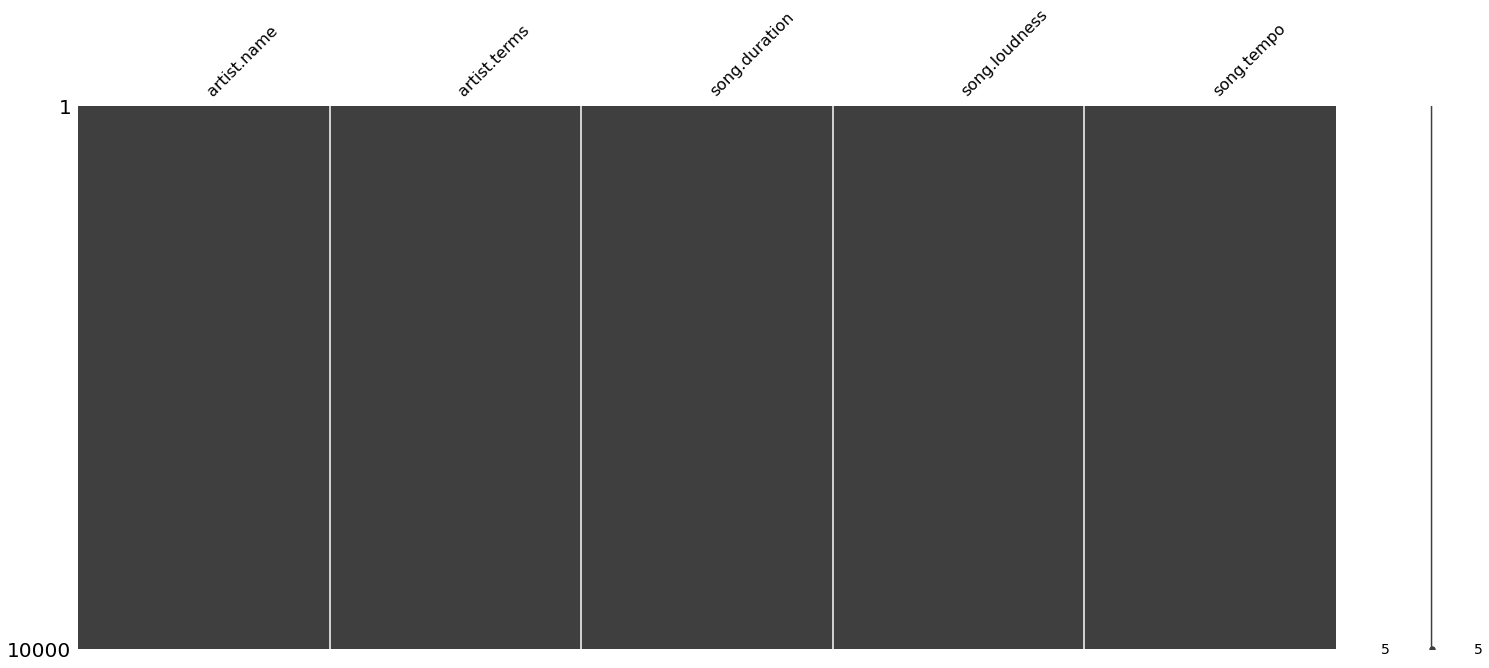

In [4]:
#Plot heatmap Missingno to visualise any missing values.
msno.matrix(df)

# There are 5 missing values in the 'artist.terms' column. Drop them from the DF.
df["artist.terms"] = df["artist.terms"].fillna(0.0).astype(str)

# WHICH WORDS USED TO DESCRIBE A MUSIC GENRE OCCUR MOST FREQUENTLY IN THE DATASET?

### (1a) ALL GENRES 

There are 106867 words in combination of all 'artist.terms'.


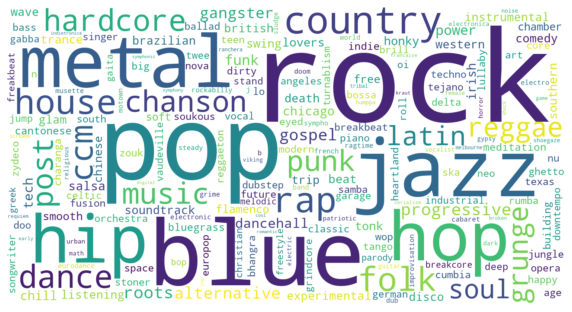

In [5]:
# Float values found in the artist.terms column. Convert to string.

df["artist.terms"] = df["artist.terms"].astype(str) 

text = " ".join(genres for genres in df['artist.terms'])

print("There are {} words in combination of all 'artist.terms'.".format(len(text)))

# Create stopword list to exclude certain words/phrases:
stopwords = set(STOPWORDS)
stopwords.update(["new", "hard", "heavy", "easy", "black"])

# Generate a word cloud image-get rid of any duplicate words.
wordcloud = WordCloud(stopwords=stopwords, background_color="white",
                      width=1500, height=800, margin=2,collocations=False).generate(text)

# Display the generated image

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### (1b) TOP 50 MOST COMMON TERMS 

There are 106867 words in combination of all 'artist.terms'.


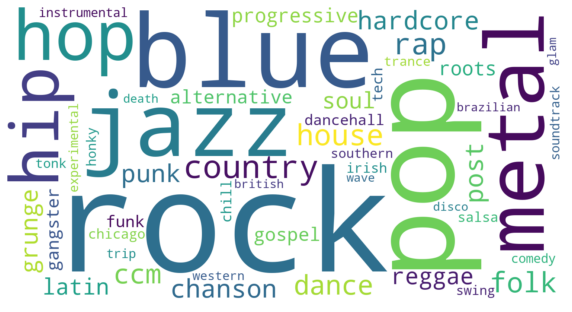

In [6]:
text = " ".join(genres for genres in df['artist.terms'])

print("There are {} words in combination of all 'artist.terms'.".format(len(text)))

# Create stopword list to exclude certain words/phrases:
stopwords = set(STOPWORDS)
stopwords.update(["new", "hard", "heavy", "easy", "black", "music", "beat", "listening",
                 "lovers", "power"])

# Generate a word cloud image-get rid of any duplicate words.
wordcloud = WordCloud(stopwords=stopwords, max_words = 50, background_color="white",
                      width=1500, height=800, margin=2,collocations=False).generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 2.	COMPARISON OF SONG DURATION, SONG TEMPO, AND SONG LOUDNESS ACROSS FOUR MAJOR GENRES

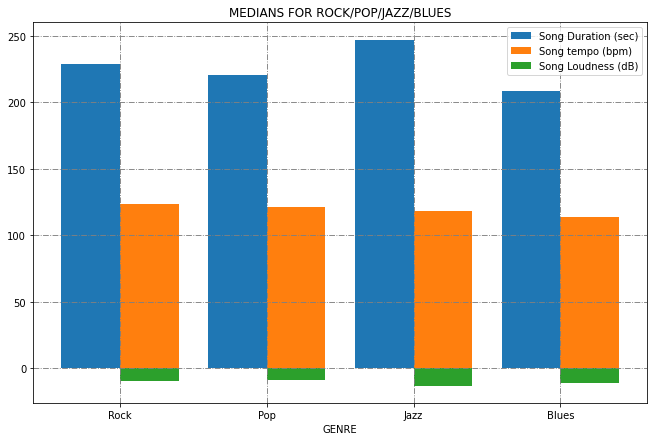

 R O C K

*'rock' can be found in 16.59% of the time in the 'artist.terms' column.

SONG DURATION:
median    228.623220
mean      240.379849
Name: song.duration, dtype: float64

SONG TEMPO:
median    123.382000
mean      124.483998
Name: song.tempo, dtype: float64

SONG LOUDNESS:
median    -9.186000
mean     -10.000145
Name: song.loudness, dtype: float64


P O P

*'pop' can be found in 10.71% of the time in the 'artist.terms' column.

SONG DURATION:
median    220.551380
mean      228.072307
Name: song.duration, dtype: float64

SONG TEMPO:
median    121.687000
mean      123.095686
Name: song.tempo, dtype: float64

SONG LOUDNESS:
median   -8.700000
mean     -9.751307
Name: song.loudness, dtype: float64


J A Z Z

*'jazz' can be found in 5.8999999999999995% of the time in the 'artist.terms' column.

SONG DURATION:
median    247.274645
mean      261.888299
Name: song.duration, dtype: float64

SONG TEMPO:
median    118.185500
mean      121.771946
Name: song.tempo, dtype: float64

SONG LOUDN

In [7]:
# R O C K 

# Find all rows that contain the word 'rock' in the 'artist.terms' column. Work out
# percentage. 
rock_all_genres = df[df['artist.terms'].str.contains('rock')]
rock_no_rows = rock_all_genres.index #The word 'rock' appears in 1659 of the 10000 rows.

# For the rows that contain 'rock', get the median & mean for song duration, song tempo, 
# song loudness. 
rock_song_duration_mean_median = rock_all_genres['song.duration'].agg(['median','mean'])
rock_song_tempo_mean_median = rock_all_genres['song.tempo'].agg(['median','mean'])
rock_song_loudness_mean_median = rock_all_genres['song.loudness'].agg(['median','mean'])

# P O P

# Find all rows that contain the word 'pop' in the 'artist.terms' column. Work out
# percentage.  
pop_all_genres = df[df['artist.terms'].str.contains('pop')]
pop_no_rows = pop_all_genres.index #The word 'pop' appears in 1071 of the 10000 rows.

# For the rows that contain 'pop', get the median & mean for song duration, song tempo, 
# song loudness. 
pop_song_duration_mean_median = pop_all_genres['song.duration'].agg(['median','mean'])
pop_song_tempo_mean_median = pop_all_genres['song.tempo'].agg(['median','mean'])
pop_song_loudness_mean_median = pop_all_genres['song.loudness'].agg(['median','mean'])

# J A Z Z 

# Find all rows that contain the word 'jazz' in the 'artist.terms' column. Work out
# percentage. 
jazz_all_genres = df[df['artist.terms'].str.contains('jazz')]
jazz_no_rows = jazz_all_genres.index #The word 'rock' appears in 590 of the 10000 rows.

# For the rows that contain 'jazz', get the median & mean for song duration, song tempo, 
# song loudness. 
jazz_song_duration_mean_median = jazz_all_genres['song.duration'].agg(['median','mean'])
jazz_song_tempo_mean_median = jazz_all_genres['song.tempo'].agg(['median','mean'])
jazz_song_loudness_mean_median = jazz_all_genres['song.loudness'].agg(['median','mean'])

# B L U E S 

# Find all rows that contain the word 'blue' in the 'artist.terms' column. Work out
# percentage. 
blue_all_genres = df[df['artist.terms'].str.contains('blue')]
blue_no_rows = blue_all_genres.index #The word 'pop' appears in 826 of the 10000 rows.

# For the rows that contain 'blue', get the median & mean for song duration, song tempo, 
# song loudness. 
blue_song_duration_mean_median = blue_all_genres['song.duration'].agg(['median','mean'])
blue_song_tempo_mean_median = blue_all_genres['song.tempo'].agg(['median','mean'])
blue_song_loudness_mean_median = blue_all_genres['song.loudness'].agg(['median','mean'])

# P L O T   G R A P H

# Create genre categories to be plotted on x axis of plot. 
X = ['Rock', 'Pop', 'Jazz', 'Blues']

# Create song duration, song tempo, song loudness lists, put medians for each genre 
# (rock, pop, jazz, blues) into their respective lists. 
data_song_duration = [228.623220, 220.551380, 247.274645, 208.574240]
data_song_tempo = [123.382000, 121.687000, 118.185500, 114.142000]
data_song_loudness = [-9.186000, -8.700000, -12.934500, -11.04450]

X_axis = np.arange(len(X))

# Create graph with grid lines.
plt.figure(figsize=(11,7))
plt.grid(True, color = "grey", linewidth = "0.9", linestyle = "-.")

# Create and customise bars.
plt.bar(X_axis - 0.2, data_song_duration, 0.4, label = 'Song Duration (sec)')
plt.bar(X_axis + 0.2, data_song_tempo, 0.4, label = 'Song tempo (bpm)')
plt.bar(X_axis + 0.2, data_song_loudness, 0.4, label = 'Song Loudness (dB)')

# Create labels & Title.
plt.xticks(X_axis, X)
plt.xlabel("GENRE")
plt.ylabel('')
plt.title("MEDIANS FOR ROCK/POP/JAZZ/BLUES")
plt.legend()
plt.show()

print(" R O C K\n")
print("*'rock' can be found in " + str(1659/10000*100) + "% of the time in the 'artist.terms' column.\n")
print("SONG DURATION:\n" + str(rock_song_duration_mean_median) + '\n')
print("SONG TEMPO:\n" + str(rock_song_tempo_mean_median) + '\n')
print("SONG LOUDNESS:\n" + str(rock_song_loudness_mean_median) + '\n')

print("\nP O P\n")
print("*'pop' can be found in " + str(1071/10000*100) + "% of the time in the 'artist.terms' column.\n")
print("SONG DURATION:\n" + str(pop_song_duration_mean_median) + '\n')
print("SONG TEMPO:\n" + str(pop_song_tempo_mean_median) + '\n')
print("SONG LOUDNESS:\n" + str(pop_song_loudness_mean_median) + '\n')

print("\nJ A Z Z\n")
print("*'jazz' can be found in " + str(590/10000*100) + "% of the time in the 'artist.terms' column.\n")
print("SONG DURATION:\n" + str(jazz_song_duration_mean_median) + '\n')
print("SONG TEMPO:\n" + str(jazz_song_tempo_mean_median) + '\n')
print("SONG LOUDNESS:\n" + str(jazz_song_loudness_mean_median) + '\n')

print("\nB L U E\n")
print("*'blue' can be found in " + str(826/10000*100) + "% of the time in the 'artist.terms' column.\n")
print("SONG DURATION:\n" + str(blue_song_duration_mean_median) + '\n')
print("SONG TEMPO:\n" + str(blue_song_tempo_mean_median) + '\n')
print("SONG LOUDNESS:\n" + str(blue_song_loudness_mean_median) + '\n')

# 3.	CORRELATION BETWEEN SONG LOUDNESS VS SONG TEMPO FOR THE FOUR MAJOR GENRES

### ROCK: SONG LOUDNESS VS TEMPO

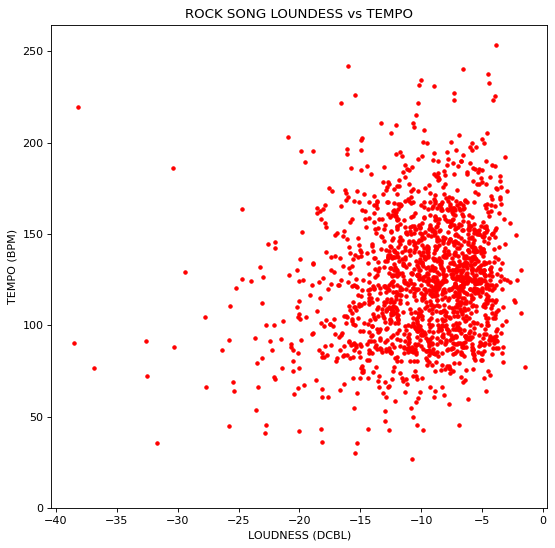

In [8]:

rock_rows = df[df['artist.terms'].str.contains('rock')]

# Concat the above columns into a new DataFrame.
rock_df = pd.concat([rock_rows], axis = 'columns', sort = False)

# Assign the 'song.loudness' and 'song.tempo' columns to variables.
loudness = rock_df['song.loudness']
tempo = rock_df['song.tempo']

# Plot scatterplot.
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x = loudness, y = tempo, s = 9, c = 'red')
plt.xlabel('LOUDNESS (DCBL)')
plt.ylabel("TEMPO (BPM)")
plt.title('ROCK SONG LOUNDESS vs TEMPO')
plt.ylim(0)
plt.show()

### POP: SONG LOUDNESS VS TEMPO

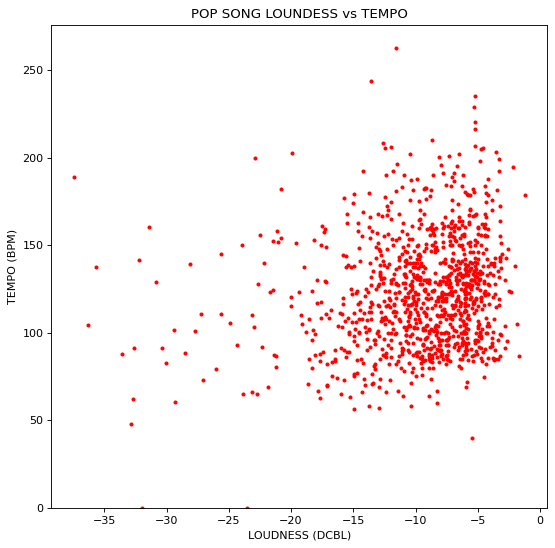

In [9]:

pop_rows = df[df['artist.terms'].str.contains('pop')]

# Concat the above columns into a new DataFrame.
pop_df = pd.concat([pop_rows], axis = 'columns', sort = False)

# Assign the 'song.loudness' and 'song.tempo' columns to variables.
loudness = pop_df['song.loudness']
tempo = pop_df['song.tempo']

# Plot scatterplot.
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x = loudness, y = tempo, s = 7, c = 'red')
plt.xlabel('LOUDNESS (DCBL)')
plt.ylabel("TEMPO (BPM)")
plt.title('POP SONG LOUNDESS vs TEMPO')
plt.ylim(0)
plt.show()

### JAZZ: SONG LOUDNESS VS TEMPO

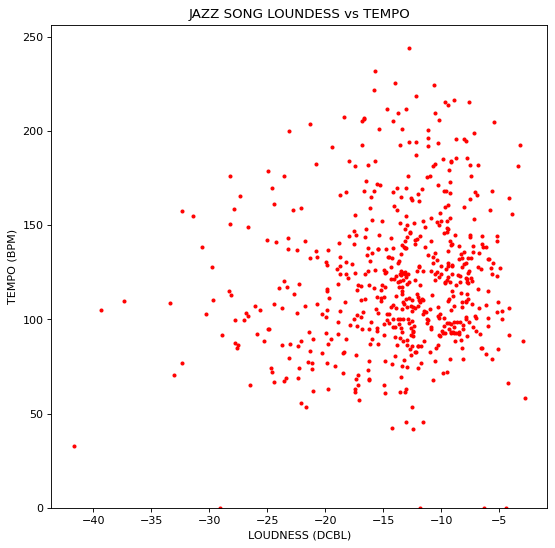

In [10]:
jazz_rows = df[df['artist.terms'].str.contains('jazz')]

# Concat the above columns into a new DataFrame.
jazz_df = pd.concat([jazz_rows], axis = 'columns', sort = False)

# Assign the 'song.loudness' and 'song.tempo' columns to variables.
loudness = jazz_df['song.loudness']
tempo = jazz_df['song.tempo']

# Plot scatterplot.
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x = loudness, y = tempo, s = 7, c = 'red')
plt.xlabel('LOUDNESS (DCBL)')
plt.ylabel("TEMPO (BPM)")
plt.title('JAZZ SONG LOUNDESS vs TEMPO')
plt.ylim(0)
plt.show()

### BLUES: SONG LOUDNESS VS TEMPO

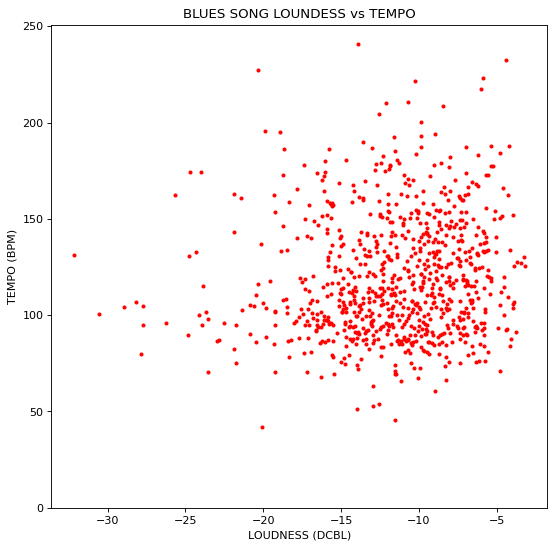

In [11]:
blues_rows = df[df['artist.terms'].str.contains('blue')]

# Concat the above columns into a new DataFrame.
blues_df = pd.concat([blues_rows], axis = 'columns', sort = False)

# Assign the 'song.loudness' and 'song.tempo' columns to variables.
loudness = blues_df['song.loudness']
tempo = blues_df['song.tempo']

# Plot scatterplot.
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x = loudness, y = tempo, s = 7, c = 'red')
plt.xlabel('LOUDNESS (DCBL)')
plt.ylabel("TEMPO (BPM)")
plt.title('BLUES SONG LOUNDESS vs TEMPO')
plt.ylim(0)
plt.show()

# 4.	SELECT SUBGENRES-COMPARISON OF SONG DURATION, SONG TEMPO, AND SONG LOUDNESS

### HIP HOP vs GANGSTER RAP vs POP RAP

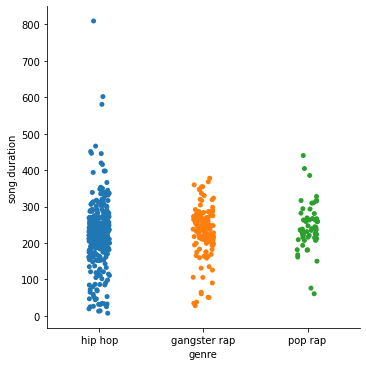

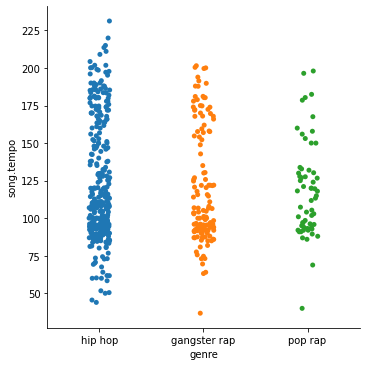

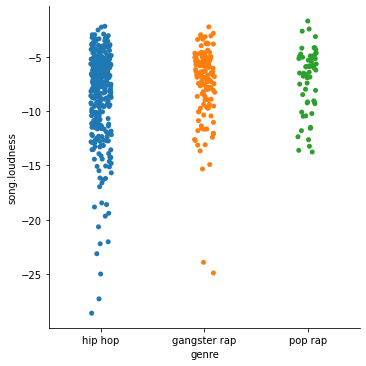

In [12]:
# Taking the following genres: (hip hop, gangster rap, pop rap), put all rows corresponding to these 
# genres and put them in a new DataFrame rap_df.
hip_hop_rows = df[df['artist.terms'].str.match('hip hop')] 
gangster_rap_rows = df[df['artist.terms'].str.match('gangster rap')]
pop_rap_rows = df[df['artist.terms'].str.match('pop rap')]

# Combine/Concat the above colmumns into a new DataFrame.
rap_df = pd.concat([hip_hop_rows, gangster_rap_rows, pop_rap_rows],sort = False)

# Rename columns. 
rap_df.rename(columns={'artist.terms': 'genre'}, inplace=True)

#plot catplot of top 3 rap/hip hop genres and distribution of song duration in seconds.
sns.catplot(x="genre", y="song.duration", data=rap_df)
sns.catplot(x="genre", y="song.tempo", data=rap_df)
sns.catplot(x="genre", y="song.loudness", data=rap_df)

### HEAVY METAL vs ALTERNATIVE METAL

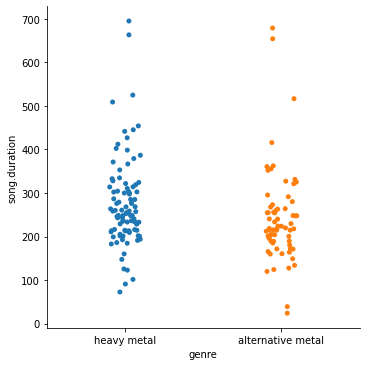

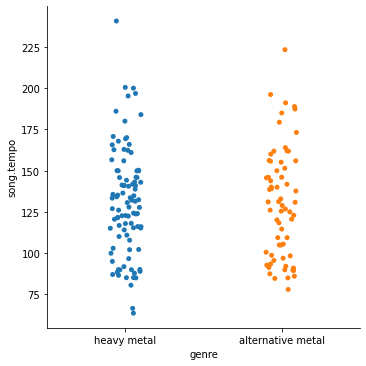

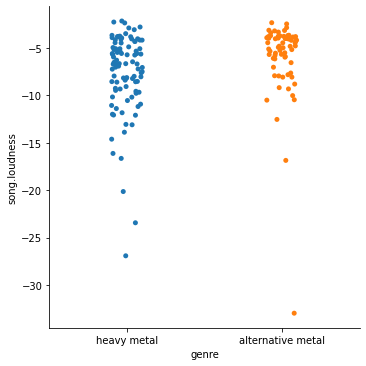

In [13]:
# Taking the following genres: (heavy metal, alternative metal), put all rows corresponding to these 
# genres and put them in a new DataFrame metal_df.
heavy_metal_rows = df[df['artist.terms'].str.match('heavy metal')] 
alternative_metal_rows = df[df['artist.terms'].str.match('alternative metal')]

# Combine/Concat the above colmumns into a new DataFrame.
metal_df = pd.concat([heavy_metal_rows, alternative_metal_rows ],sort = False)

# Rename columns. 
metal_df.rename(columns={'artist.terms': 'genre'}, inplace=True)

# Need to delete the outlier that contains song.duration of over 1700 seconds. 
# First identify the offending row. Then exclude this particular row. 
metal_df[metal_df['song.duration'] > 1000]
metal_df_revised = metal_df.loc[metal_df["song.duration"] != 1819.76771]

#plot catplot of top 3 rap/hip hop genres and distribution of song duration in seconds.
sns.catplot(x="genre", y="song.duration", data=metal_df_revised)
sns.catplot(x="genre", y="song.tempo", data=metal_df_revised)
sns.catplot(x="genre", y="song.loudness", data=metal_df_revised)

## LATIN JAZZ vs SALSA vs JAZZ FUNK vs SMOOTH JAZZ vs FLAMENCO

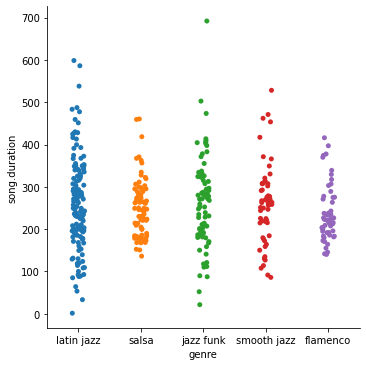

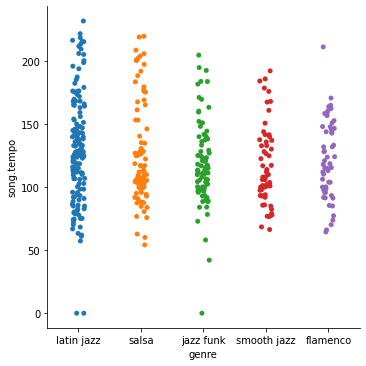

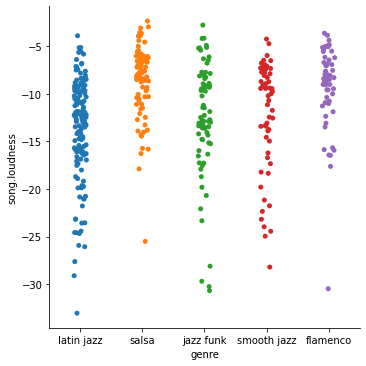

In [14]:
# Taking the following genres: (latin jazz, salsa, jazz funk, smooth jazz, flamenco), put all rows corresponding to these 
# genres and put them in a new DataFrame metal_df.
latin_jazz_rows = df[df['artist.terms'].str.match('latin jazz')] 
salsa_rows = df[df['artist.terms'].str.match('salsa')]
jazz_funk_rows = df[df['artist.terms'].str.match('jazz funk')]
smooth_jazz_rows = df[df['artist.terms'].str.match('smooth jazz')]
flamenco_rows = df[df['artist.terms'].str.match('flamenco')]

# Combine/Concat the above colmumns into a new DataFrame.
jazz_latin_df = pd.concat([latin_jazz_rows, salsa_rows, jazz_funk_rows, smooth_jazz_rows, flamenco_rows],sort = False)

# Rename columns. 
jazz_latin_df.rename(columns={'artist.terms': 'genre'}, inplace=True)

#plot catplot of top 3 rap/hip hop genres and distribution of song duration in seconds.
sns.catplot(x="genre", y="song.duration", data=jazz_latin_df)
sns.catplot(x="genre", y="song.tempo", data=jazz_latin_df)
sns.catplot(x="genre", y="song.loudness", data=jazz_latin_df)

https://www.youtube.com/watch?v=txMdrV1Ut64
https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
https://swcarpentry.github.io/python-novice-gapminder/09-plotting/
https://thispointer.com/pandas-select-dataframe-columns-containing-string/
https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html
https://www.analyticsvidhya.com/blog/2020/12/exploring-the-tale-of-music-through-data-visualization/
https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/#getting-started-bar-charting-numbers
https://www.geeksforgeeks.org/get-all-rows-in-a-pandas-dataframe-containing-given-substring/
https://corgis-edu.github.io/corgis/csv/music/
http://millionsongdataset.com/
http://millionsongdataset.com/pages/example-track-description/
https://datatofish.com/plot-dataframe-pandas/
https://github.com/amueller/word_cloud/blob/master/examples/wordcloud_cn.py
https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot#line-plot-multiple-columns
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#35.-Time-Series-Plot
https://www.analyticsvidhya.com/blog/2020/12/exploring-the-tale-of-music-through-data-visualization/

Thierry Bertin-Mahieux, Daniel P.W. Ellis, Brian Whitman, and Paul Lamere. 
The Million Song Dataset. In Proceedings of the 12th International Society
for Music Information Retrieval Conference (ISMIR 2011), 2011. 